In [21]:
#importing libraries  
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
#checking for asumptions is the part we are doing after the data laoding and visualization part

# LOAD DATA

In [22]:
data=pd.read_csv('data_science_salary_2021.csv')

In [23]:
data.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [25]:
visual = data[['Rating', 'Size','Founded', 'Revenue','Competitors','Hourly','Avg Salary(K)','Age','Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']]

In [26]:
correlations=visual.corr()

# CORRELTAIONS

In [27]:
visual.corr()

,Rating,Founded,Hourly,Avg Salary(K),Age,Python,spark,aws,excel,sql,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Rating,1.000000,0.332927,-0.019531,0.012475,0.023162,0.144665,0.156982,0.117049,-0.036466,0.134463,...,0.076893,0.058564,0.110033,0.069042,0.145098,0.001717,0.039784,0.048338,0.035587,-0.019351
Founded,0.332927,1.000000,0.049313,-0.009609,0.139165,0.103183,0.066978,-0.011123,-0.035567,0.052368,...,0.005844,0.019728,0.022332,0.040374,0.025715,0.060605,0.055393,0.038379,0.058025,0.044355
Hourly,-0.019531,0.049313,1.000000,-0.243771,0.007847,-0.193487,-0.098530,-0.030315,-0.099897,-0.187319,...,-0.036872,-0.043062,-0.051221,-0.059934,-0.081895,-0.053132,-0.052237,-0.021369,-0.041884,-0.025354
Avg Salary(K),0.012475,-0.009609,-0.243771,1.000000,0.022076,0.315552,0.170678,0.172660,-0.072323,0.002008,...,0.115658,0.044759,0.178237,0.160098,0.110562,-0.074753,-0.044491,0.085859,0.070925,-0.123306
Age,0.023162,0.139165,0.007847,0.022076,1.000000,-0.098626,-0.102418,-0.033111,0.038846,-0.117977,...,-0.065947,-0.039562,-0.081608,-0.055830,-0.053311,-0.055828,0.020544,-0.058273,0.044605,-0.058240
Python,0.144665,0.103183,-0.193487,0.315552,-0.098626,1.000000,0.347619,0.203221,-0.021519,0.373999,...,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705
spark,0.156982,0.066978,-0.098530,0.170678,-0.102418,0.347619,1.000000,0.298822,-0.047334,0.261304,...,0.107790,0.032138,0.271394,0.237612,0.537081,-0.018655,-0.044026,0.216880,0.232356,-0.051017
aws,0.117049,-0.011123,-0.030315,0.172660,-0.033111,0.203221,0.298822,1.000000,-0.019235,0.106902,...,0.132776,0.110025,0.087712,0.116905,0.276749,-0.000834,0.032589,0.154647,0.177929,-0.077330
excel,-0.036466,-0.035567,-0.099897,-0.072323,0.038846,-0.021519,-0.047334,-0.019235,1.000000,0.109548,...,-0.030136,-0.065215,-0.023238,-0.078846,0.022847,0.145915,0.068613,-0.028762,0.094860,0.112628
sql,0.134463,0.052368,-0.187319,0.002008,-0.117977,0.373999,0.261304,0.106902,0.109548,1.000000,...,0.015975,-0.011757,0.096994,0.037589,0.278207,0.379234,0.248244,-0.049602,0.198825,0.056085


In [28]:
correlations["Avg Salary(K)"]

Rating           0.012475
Founded         -0.009609
Hourly          -0.243771
Avg Salary(K)    1.000000
Age              0.022076
Python           0.315552
spark            0.170678
aws              0.172660
excel           -0.072323
sql              0.002008
sas              0.101938
keras            0.115658
pytorch          0.044759
scikit           0.178237
tensor           0.160098
hadoop           0.110562
tableau         -0.074753
bi              -0.044491
flink            0.085859
mongo            0.070925
google_an       -0.123306
Name: Avg Salary(K), dtype: float64

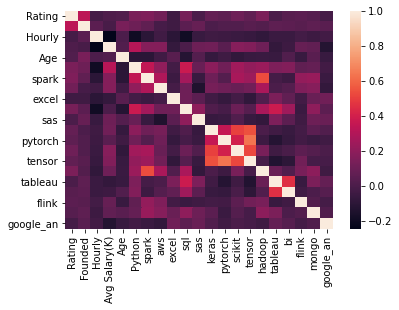

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

# NORMAL DISTRIBUTION OF VARIBALES

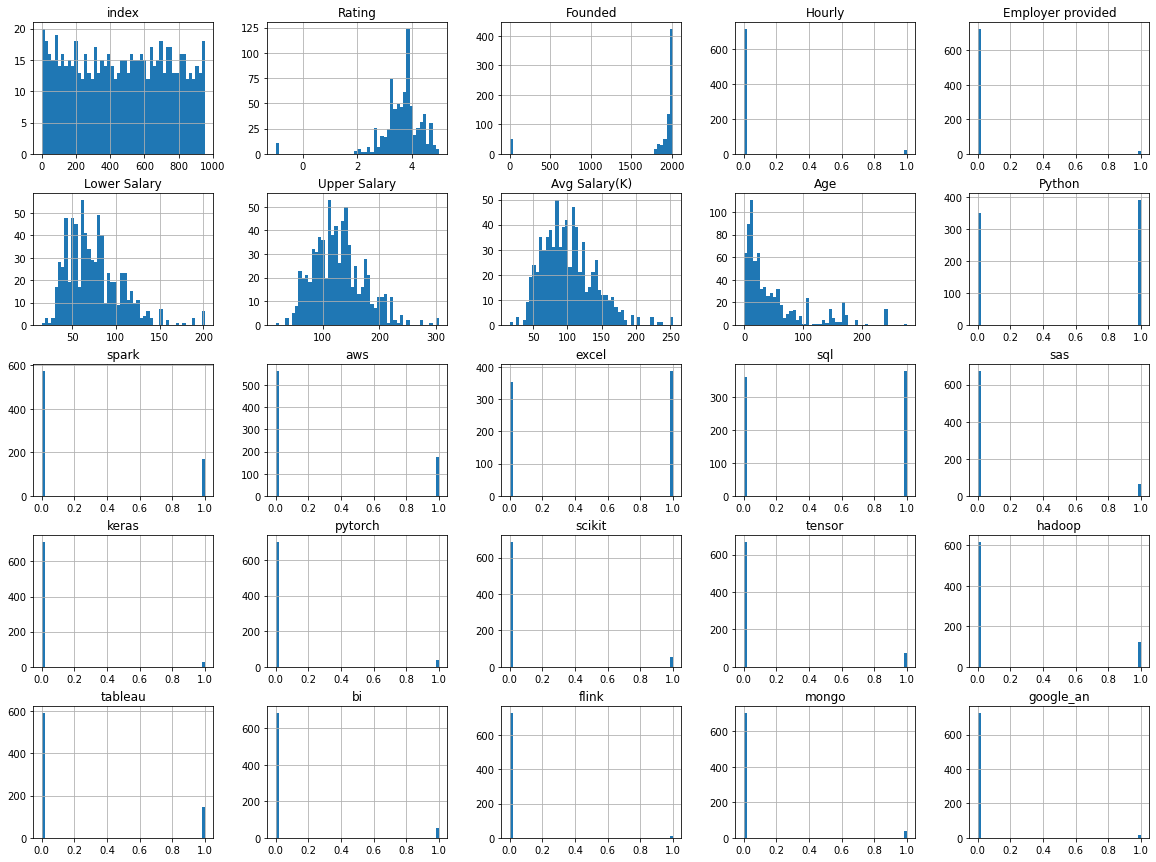

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
#check for the missing data and other irrelvant data and remove them
col_names=data.columns
num_data=data.shape[0]
print(num_data)
for c in col_names:
    num_non =data[c].isin(["?"]).sum()
    if num_non >0:
        print(c)
        print(num_non)
        print("{0:2f}%".format(float(num_non)/num_data*100))
data=data[data["Job Description"]!="?"]
data.shape
#so as we can see there is no missing or irrelevant data we can directly do one hot encoding by removing some of the redundant coilumns

742


(742, 42)

In [32]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [33]:
#features= data
target=data['Avg Salary(K)']
#elemenet sot be scaled
numerical=data[['Age']]
target=data[['Avg Salary(K)']]

#labeled elements that are avoided in botha and concatinated at the last
labeled=data[['Python','spark','aws','sas','keras','scikit','tensor','hadoop','sql','flink','mongo']]

# one hot endoeing the elements
categoricals=data[['seniority_by_title','Degree']]

# SCALE +ONE HOT ENCODE

In [34]:
scaler = StandardScaler()
numerical_scaleds=scaler.fit_transform(numerical)
scaler_target=StandardScaler()
numerical_targets=scaler.fit_transform(target)

#x = scaler.fit_transform(dff1)
#df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
numerical_scaled=pd.DataFrame(numerical_scaleds)
numerical_target=pd.DataFrame(numerical_targets)

numerical_target.head()


##numerical_scaled= label 1 normalized
##numerical_target= target  normalized


,0
0,-0.787152
1,-0.373346
2,-0.440089
3,-0.667015
4,0.347477


In [35]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(categoricals)
#cant use head becasue one hot encoding cinverts the pandas ti nunpy array
#enc.head()
numerical_one_hot =pd.get_dummies(categoricals)
numerical_one_hot.shape


(742, 6)

In [36]:
frames = [numerical_one_hot, labeled]
concat_dataset=pd.concat(frames, axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    concat_dataset, numerical_target, test_size=0.33, random_state=42)

In [38]:

#accuracy of the model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
#reg.score(X_test, y_test)
#reg.coef_
#reg.intercept_
#reg.predict(np.array([[3, 5]]))

# USE OF METRICS FOR MODEL EVALUATION

In [39]:
#mean square error in sklearn
preocted_values = reg.predict(X_test)
model_error = mean_squared_error(y_test, preocted_values)
print(f"The mean squared error of the optimal model is {model_error:.2f}")
from sklearn.metrics import mean_absolute_error
model_error_absolute = mean_absolute_error(y_test, preocted_values)
print(f"The mean squared absolute error of the optimal model is {model_error_absolute:.2f}")

rms = mean_squared_error(y_test, preocted_values, squared=False)
print(f"The root mean squared error of the optimal model is {rms:.2f}")


The mean squared error of the optimal model is 0.78
The mean squared absolute error of the optimal model is 0.68
The root mean squared error of the optimal model is 0.88


# I HAVE ADDITIONAL DETAILS IN DOCUMENTATION